In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2
import os

from xml.dom.minidom import parseString
from xml.etree import ElementTree
from xml.etree.ElementTree import Element, SubElement
from lxml import etree
import codecs

%matplotlib inline

In [2]:
ENCODE_METHOD = 'utf-8'

def prettify(elem):
    """
        Return a pretty-printed XML string for the Element.
    """
    rough_string = ElementTree.tostring(elem, 'utf8')
    root = etree.fromstring(rough_string)
    return etree.tostring(root, 
                          pretty_print=True, 
                          encoding=ENCODE_METHOD).replace("  ".encode(), 
                                                          "\t".encode())


In [3]:
def xml_writer(input_dir, output_dir, image_info, target_file=None):
    image_name, boxes = image_info[0], image_info[1:]
    node_root = Element('annotation')

    node_folder = SubElement(node_root, 'folder')
    node_folder.text = output_dir

    node_filename = SubElement(node_root, 'filename')
    node_filename.text = image_name

    node_source = SubElement(node_root, 'source')
    node_database = SubElement(node_source, 'database')
    node_database.text = 'Unknown'

    node_size = SubElement(node_root, 'size')
    image_data = cv2.imread(os.path.join(input_dir, image_name))
    node_width = SubElement(node_size, 'width')
    node_width.text = str(image_data.shape[1])
    node_height = SubElement(node_size, 'height')
    node_height.text = str(image_data.shape[0])
    node_depth = SubElement(node_size, 'depth')
    node_depth.text = '3'

    node_segmented = SubElement(node_root, 'segmented')
    node_segmented.text = '0'

    for box in boxes:
        node_object = SubElement(node_root, 'object')
        node_name = SubElement(node_object, 'name')
        node_name.text = 'car'
        node_pose = SubElement(node_object, 'pose')
        node_pose.text = 'Unspecified'
        node_truncated = SubElement(node_object, 'truncated')
        node_truncated.text = '0'
        node_difficult = SubElement(node_object, 'difficult')
        node_difficult.text = '0'
        node_bndbox = SubElement(node_object, 'bndbox')
        node_xmin = SubElement(node_bndbox, 'xmin')
        node_xmin.text = str(box[0])
        node_ymin = SubElement(node_bndbox, 'ymin')
        node_ymin.text = str(box[1])
        node_xmax = SubElement(node_bndbox, 'xmax')
        node_xmax.text = str(box[2])
        node_ymax = SubElement(node_bndbox, 'ymax')
        node_ymax.text = str(box[3])

    out_file = None
    if not os.path.exists(output_dir):
        os.mkdir(output_dir)
    if target_file is None:
        target_file = image_name[:image_name.rfind('.')] + '.xml'
    out_file = codecs.open(
        os.path.join(output_dir, target_file), 'w', encoding=ENCODE_METHOD)

    prettify_result = prettify(node_root)
    out_file.write(prettify_result.decode('utf8'))
    out_file.close()

## train_1w

In [9]:
data_1w = pd.read_csv('F:\\tf-faster-rcnn\\cross_images\\train_1w.csv',keep_default_na = False)

In [10]:
new_data_1w = []
for index, each_data in enumerate(data_1w.values):
    temp_data = []
    temp_data.append(each_data[0])
    if each_data[1] != '':
        for box_str in each_data[1].split(';'):
            # 757_2_133_78;541_131_168_164;
            if box_str == '':
                continue
            box = list(map(float, box_str.split('_')))
            box[2] = box[0] + box[2]
            box[3] = box[1] + box[3]
            temp_data.append(box)
    new_data_1w.append(temp_data)

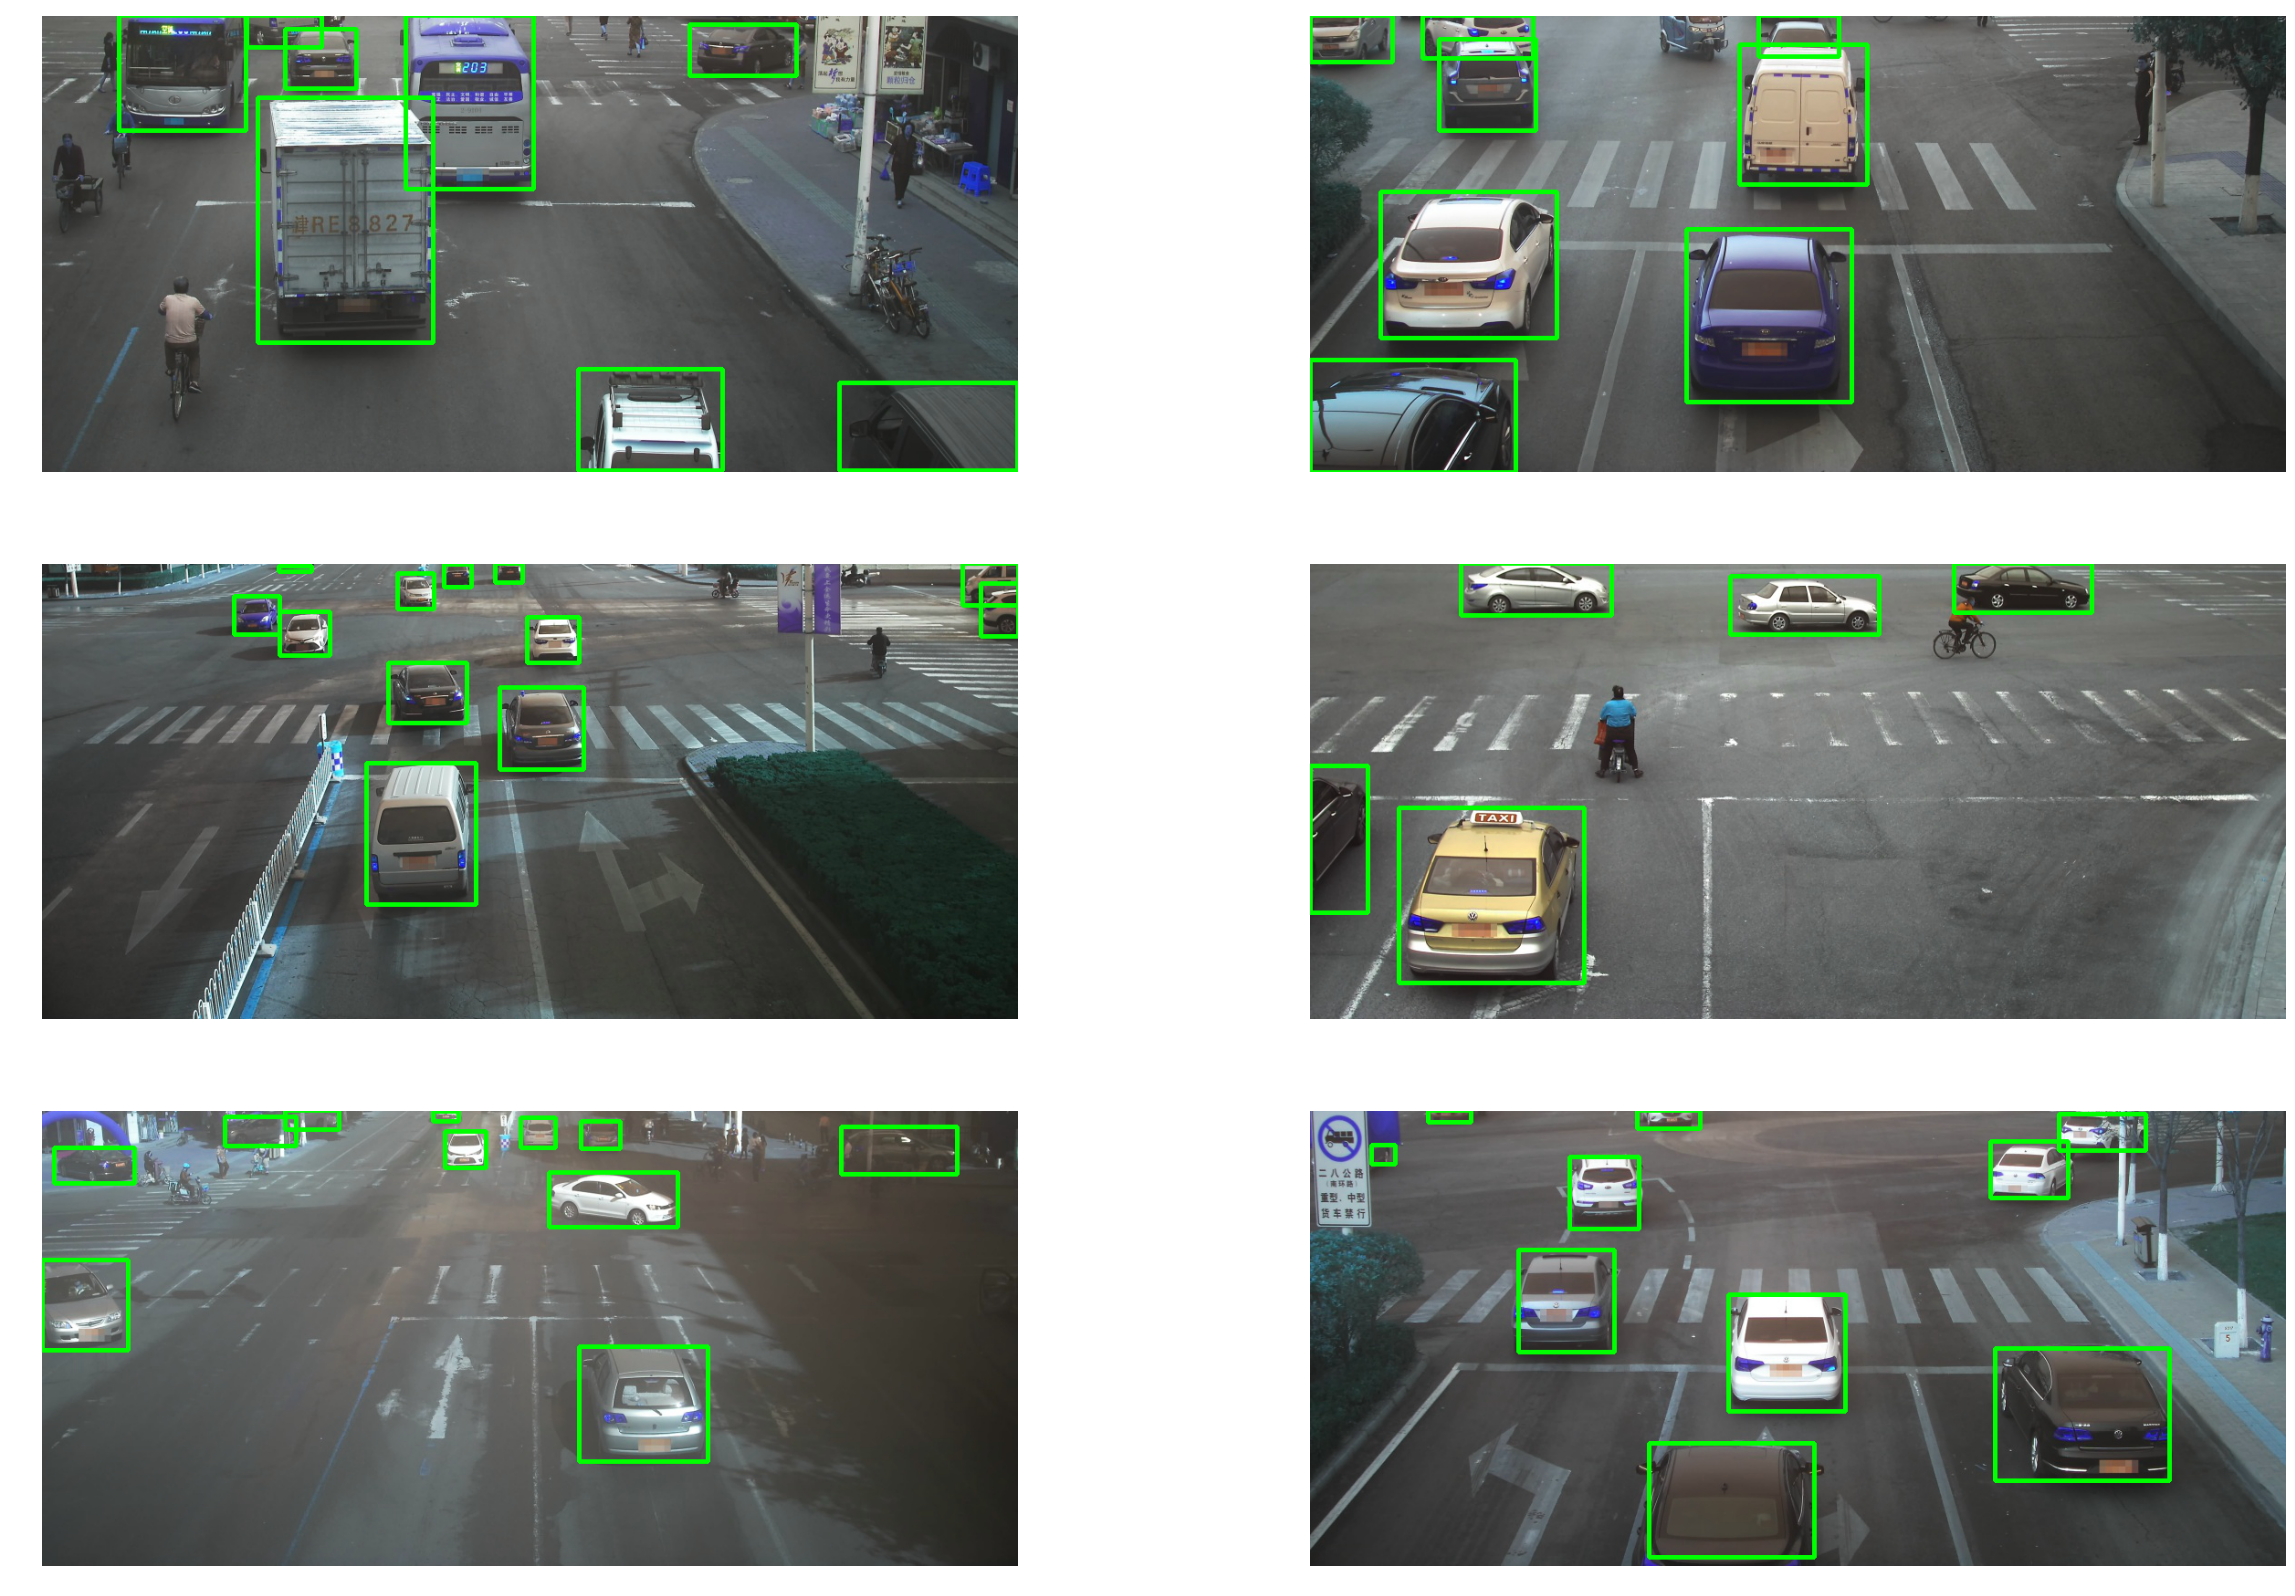

In [12]:
test_1w = np.random.choice(new_data_1w, 6)
plt.figure(figsize=(30, 20))
for index, test in enumerate(test_1w):
    image_data = cv2.imread(os.path.join('F:\\tf-faster-rcnn\\cross_images\\train_1w', test[0]))
    for box in test[1:]: 
        box = list(map(int, box))
        cv2.rectangle(image_data, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 3)
    plt.subplot(3, 2, index + 1)
    plt.imshow(image_data)
    plt.axis('off')

In [13]:
print(len(new_data_1w) == 10602)

True


In [15]:
for each_data in new_data_1w:
    xml_writer('F:\\tf-faster-rcnn\\cross_images\\train_1w','F:\\tf-faster-rcnn\\cross_images\\Annotations',each_data)

## train_b

In [16]:
data_b = pd.read_csv('F:\\tf-faster-rcnn\\cross_images\\train_b.csv',keep_default_na = False)

In [17]:
new_data_b = []
for index, each_data in enumerate(data_b.values):
    temp_data = []
    temp_data.append(each_data[0])
    if each_data[1] == '':
        continue
    for box_str in each_data[1].split(';'):
        # 757_2_133_78;541_131_168_164;
        if box_str == '':
            continue
        box = list(map(float, box_str.split('_')))
        box[2] = box[0] + box[2]
        box[3] = box[1] + box[3]
        temp_data.append(box)
    new_data_b.append(temp_data)

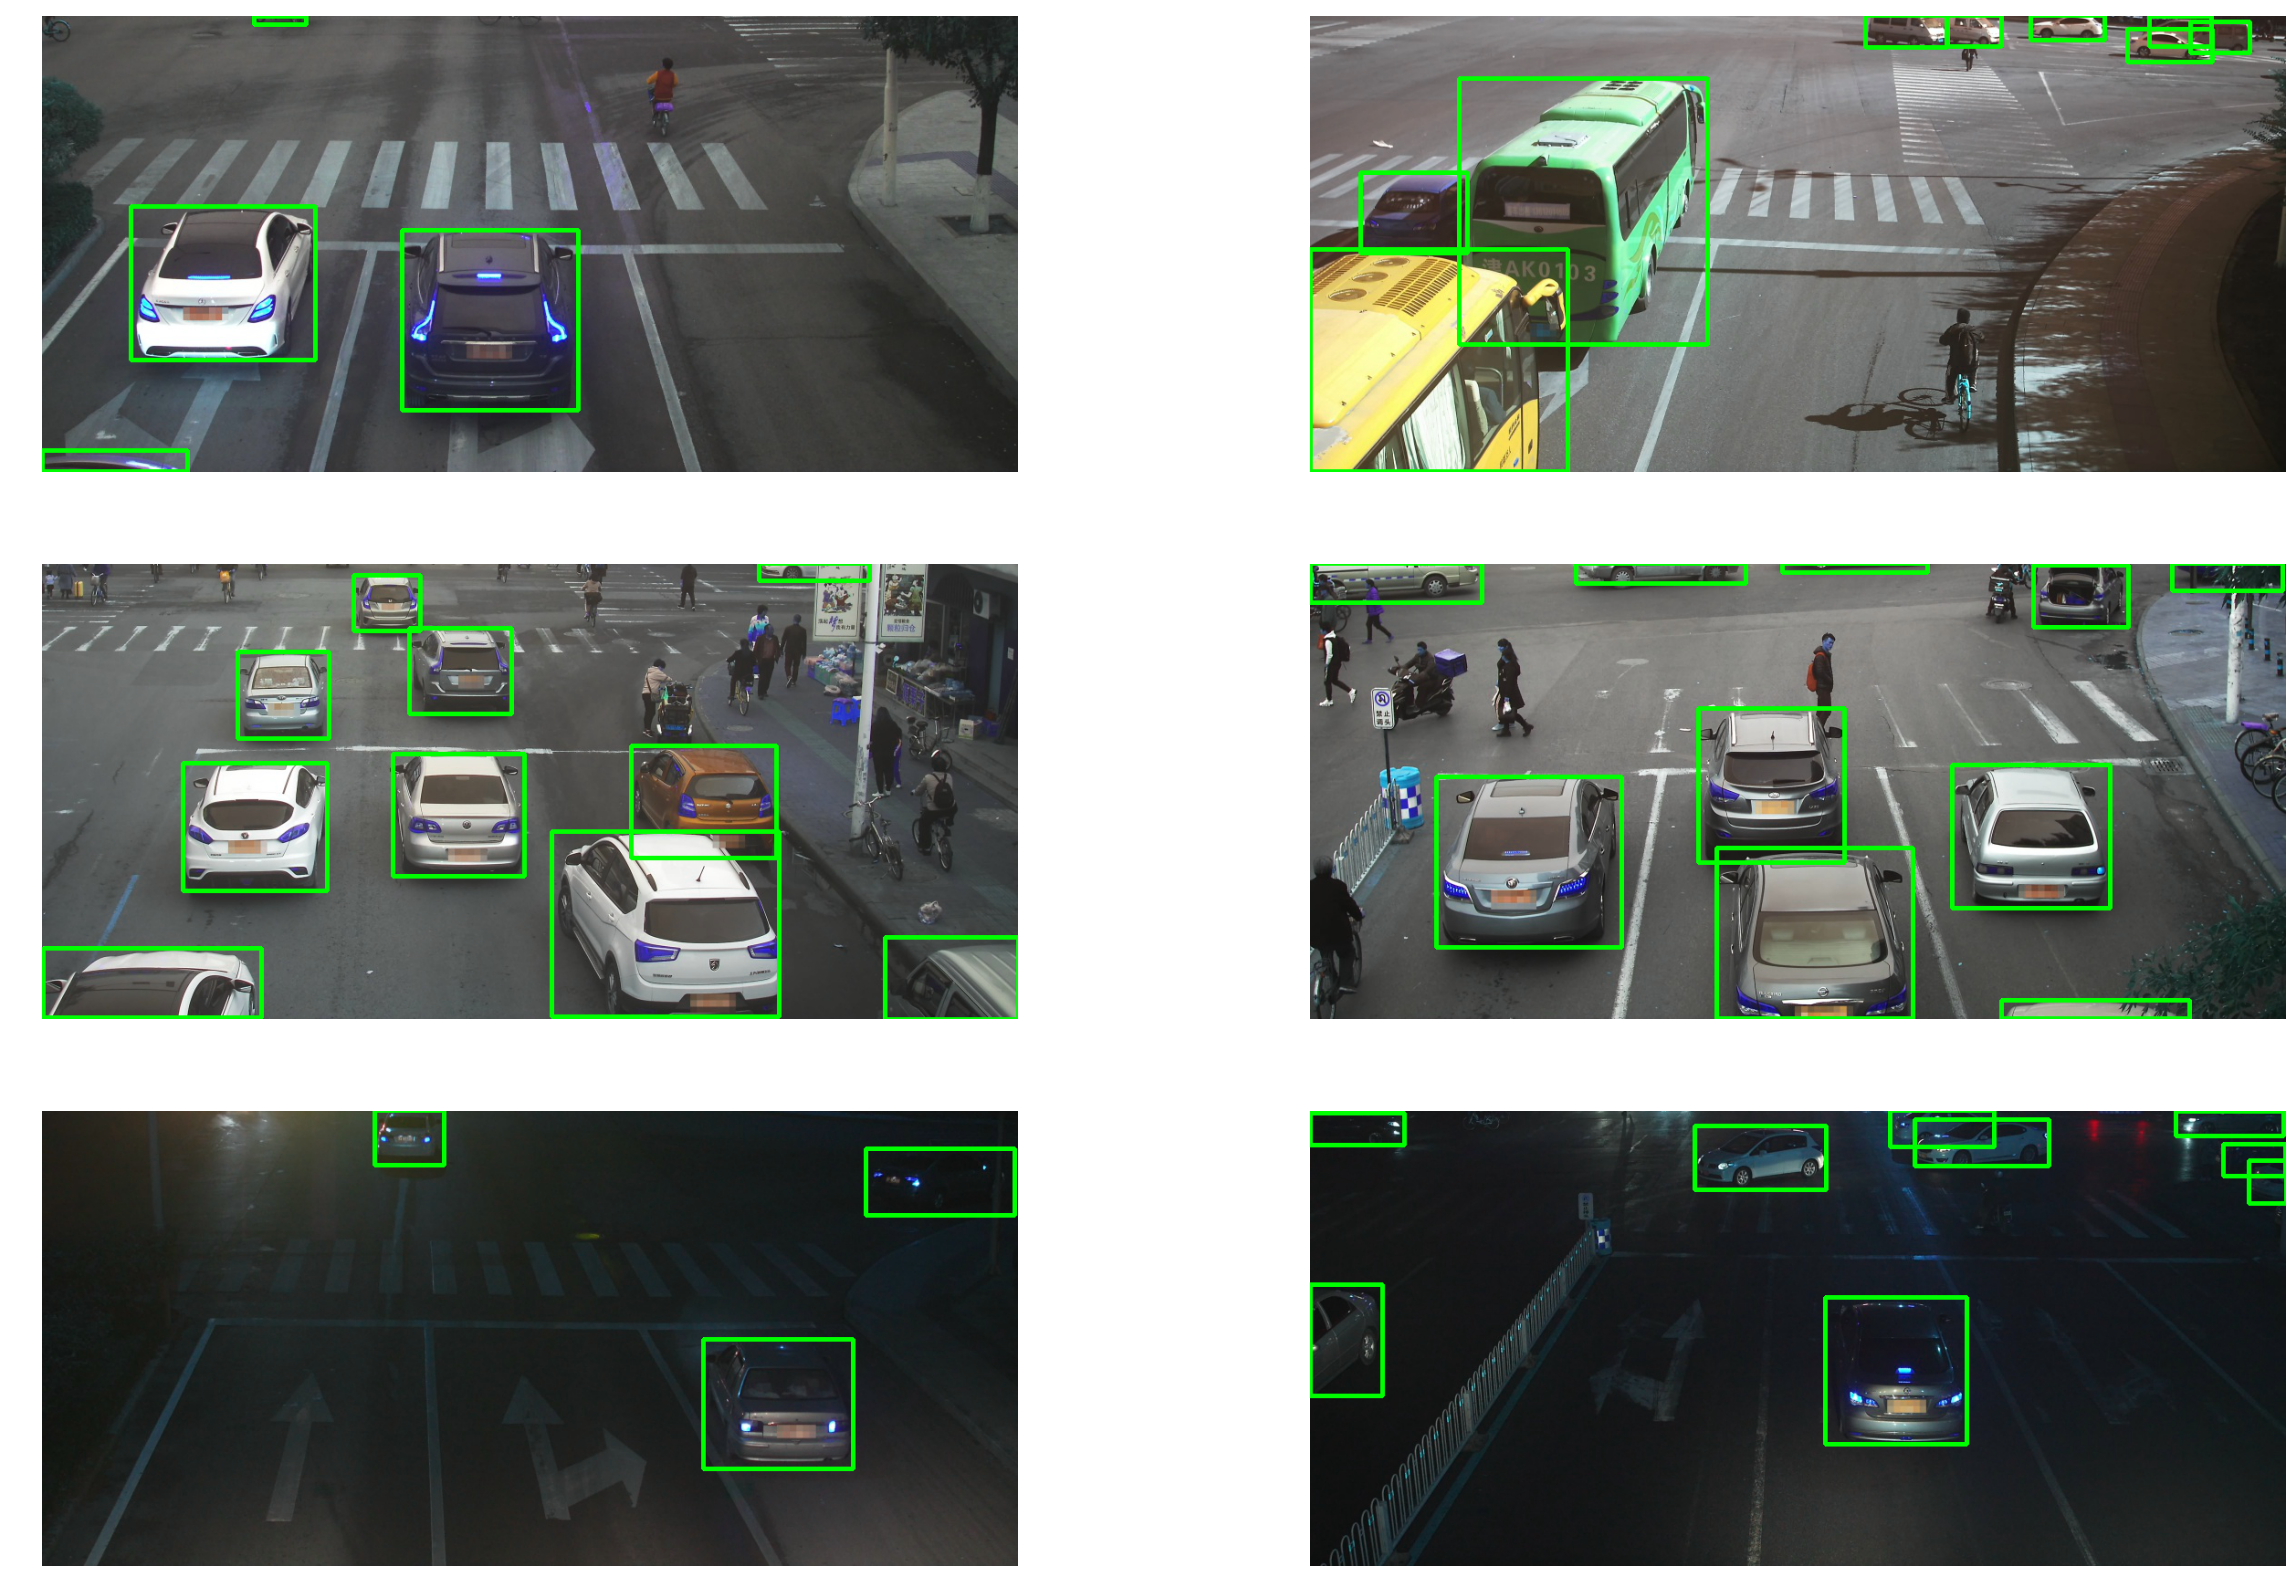

In [18]:
test_b = np.random.choice(new_data_b, 6)
plt.figure(figsize=(30, 20))
for index, test in enumerate(test_b):
    image_data = cv2.imread(os.path.join('F:\\tf-faster-rcnn\\cross_images\\train_b', test[0]))
    for box in test[1:]: 
        box = list(map(int, box))
        cv2.rectangle(image_data, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 3)
    plt.subplot(3, 2, index + 1)
    plt.imshow(image_data)
    plt.axis('off')

In [19]:
print(len(new_data_b) == 1000)

True


In [20]:
for each_data in new_data_b:
    xml_writer('F:\\tf-faster-rcnn\\cross_images\\train_b', 'F:\\tf-faster-rcnn\\cross_images\\Annotations', each_data)